# Predicting the Survival State of Patients with Liver Cirrhosis  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense,Input
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("cirrhosis_new.csv")
df.head(10)

ID  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   
5   5     703  D-penicillamine  19270   F       N            Y       N     N   
6   6    1300          Placebo  17703   F       N            N       N     N   
7   7    1615          Placebo  21281   F       N            Y       N     N   
8   8    2050  D-penicillamine  20684   F       N            N       N     N   
9   9    2615  D-penicillamine  15009   F       N            N       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   
5        0.6        227.0     3.46    34.0    6456.2   60.63           68.0   
6        1.0        328.0     3.35    43.0    1677.0  137.95           90.0   
7        0.6        273.0     3.94    36.0     598.0   52.70          214.0   
8        0.7        360.0     3.65    72.0    3196.0   94.55          154.0   
9        0.9        478.0     3.60    39.0    1758.0  171.00          140.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C  
5      213.0         11.5    3.0      D  
6      291.0          9.8    3.0      C  
7      227.0          9.9    3.0      C  
8      269.0          9.8    2.0      C  
9      234.0         10.6    2.0      C

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323 entries, 0 to 8322
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8323 non-null   int64  
 1   N_Days         8323 non-null   int64  
 2   Drug           8217 non-null   object 
 3   Age            8323 non-null   int64  
 4   Sex            8323 non-null   object 
 5   Ascites        8217 non-null   object 
 6   Hepatomegaly   8217 non-null   object 
 7   Spiders        8217 non-null   object 
 8   Edema          8323 non-null   object 
 9   Bilirubin      8323 non-null   float64
 10  Cholesterol    8189 non-null   float64
 11  Albumin        8323 non-null   float64
 12  Copper         8215 non-null   float64
 13  Alk_Phos       8217 non-null   float64
 14  SGOT           8217 non-null   float64
 15  Tryglicerides  8187 non-null   float64
 16  Platelets      8312 non-null   float64
 17  Prothrombin    8321 non-null   float64
 18  Stage   

In [4]:
df.isnull().sum()

ID                 0
N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [5]:
df.describe()

ID       N_Days           Age    Bilirubin  Cholesterol  \
count  8323.000000  8323.000000   8323.000000  8323.000000  8189.000000   
mean   3764.043133  2024.528776  18381.192359     2.625940   351.219074   
std    2369.682885  1094.968696   3686.832308     3.847146   196.775246   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1662.500000  1220.000000  15574.000000     0.700000   248.000000   
50%    3743.000000  1831.000000  18713.000000     1.100000   299.000000   
75%    5823.500000  2689.000000  20684.000000     3.000000   392.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  8323.000000  8215.000000   8217.000000  8217.000000    8187.000000   
mean      3.545767    84.421546   1823.044883   114.906530     115.662636   
std       0.350697    76.327480   1913.388685    49.134067      53.037660   
min       1.960000     4.000000    289.000000    26.350000      33.000000   
25%       3.350000    39.000000    834.000000    75.950000      84.000000   
50%       3.580000    63.000000   1181.000000   108.500000     104.000000   
75%       3.770000   102.000000   1857.000000   137.950000     139.000000   
max       4.640000   588.000000  13862.400000   457.250000     598.000000   

         Platelets  Prothrombin        Stage  
count  8312.000000  8321.000000  8317.000000  
mean    264.827238    10.634575     3.032103  
std      88.039809     0.795707     0.867235  
min      62.000000     9.000000     1.000000  
25%     210.000000    10.000000     2.000000  
50%     264.000000    10.600000     3.000000  
75%     316.000000    11.000000     4.000000  
max     721.000000    18.000000     4.000000

In [6]:
df.duplicated().sum()

0

In [7]:
# Check class distribution
print("Class Distribution:\n", df['Status'].value_counts())

Class Distribution:
 C     5197
D     2826
CL     300
Name: Status, dtype: int64


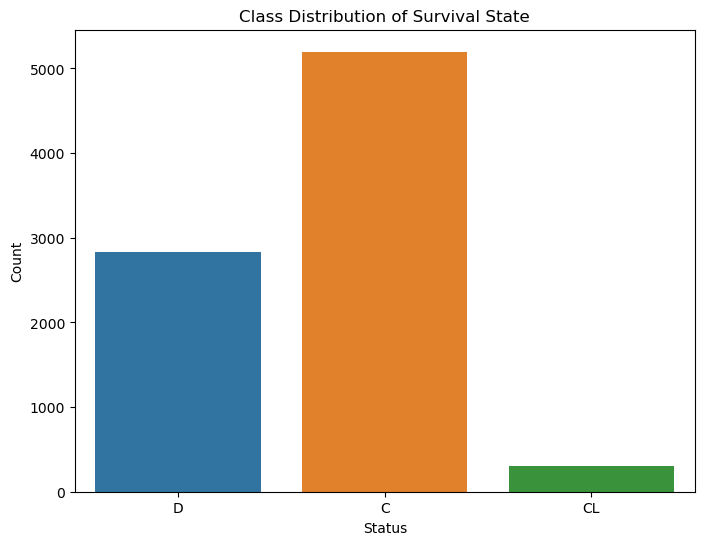

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df , x='Status')
plt.title('Class Distribution of Survival State')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


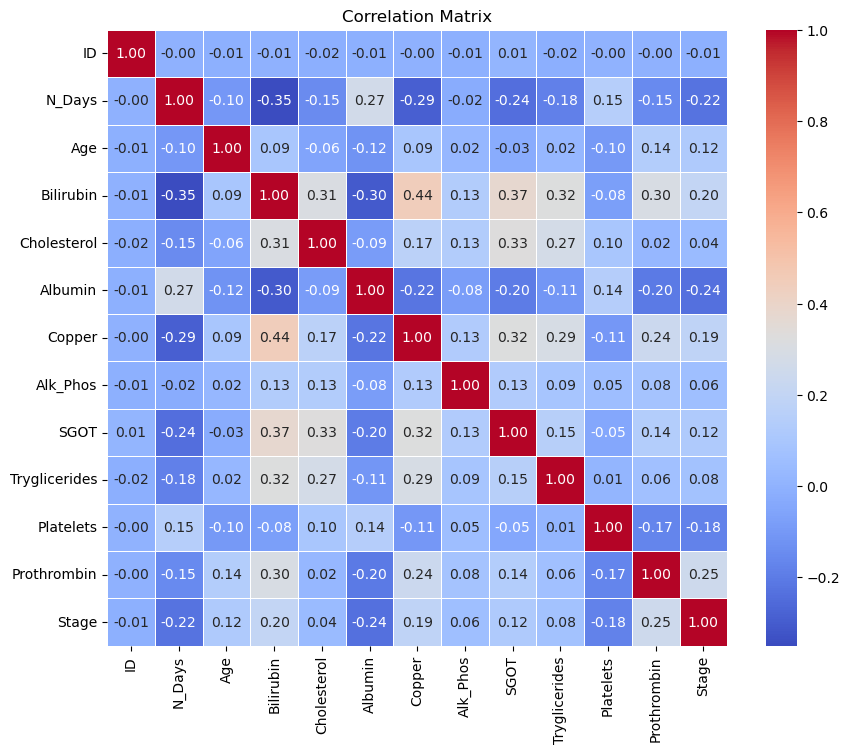

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

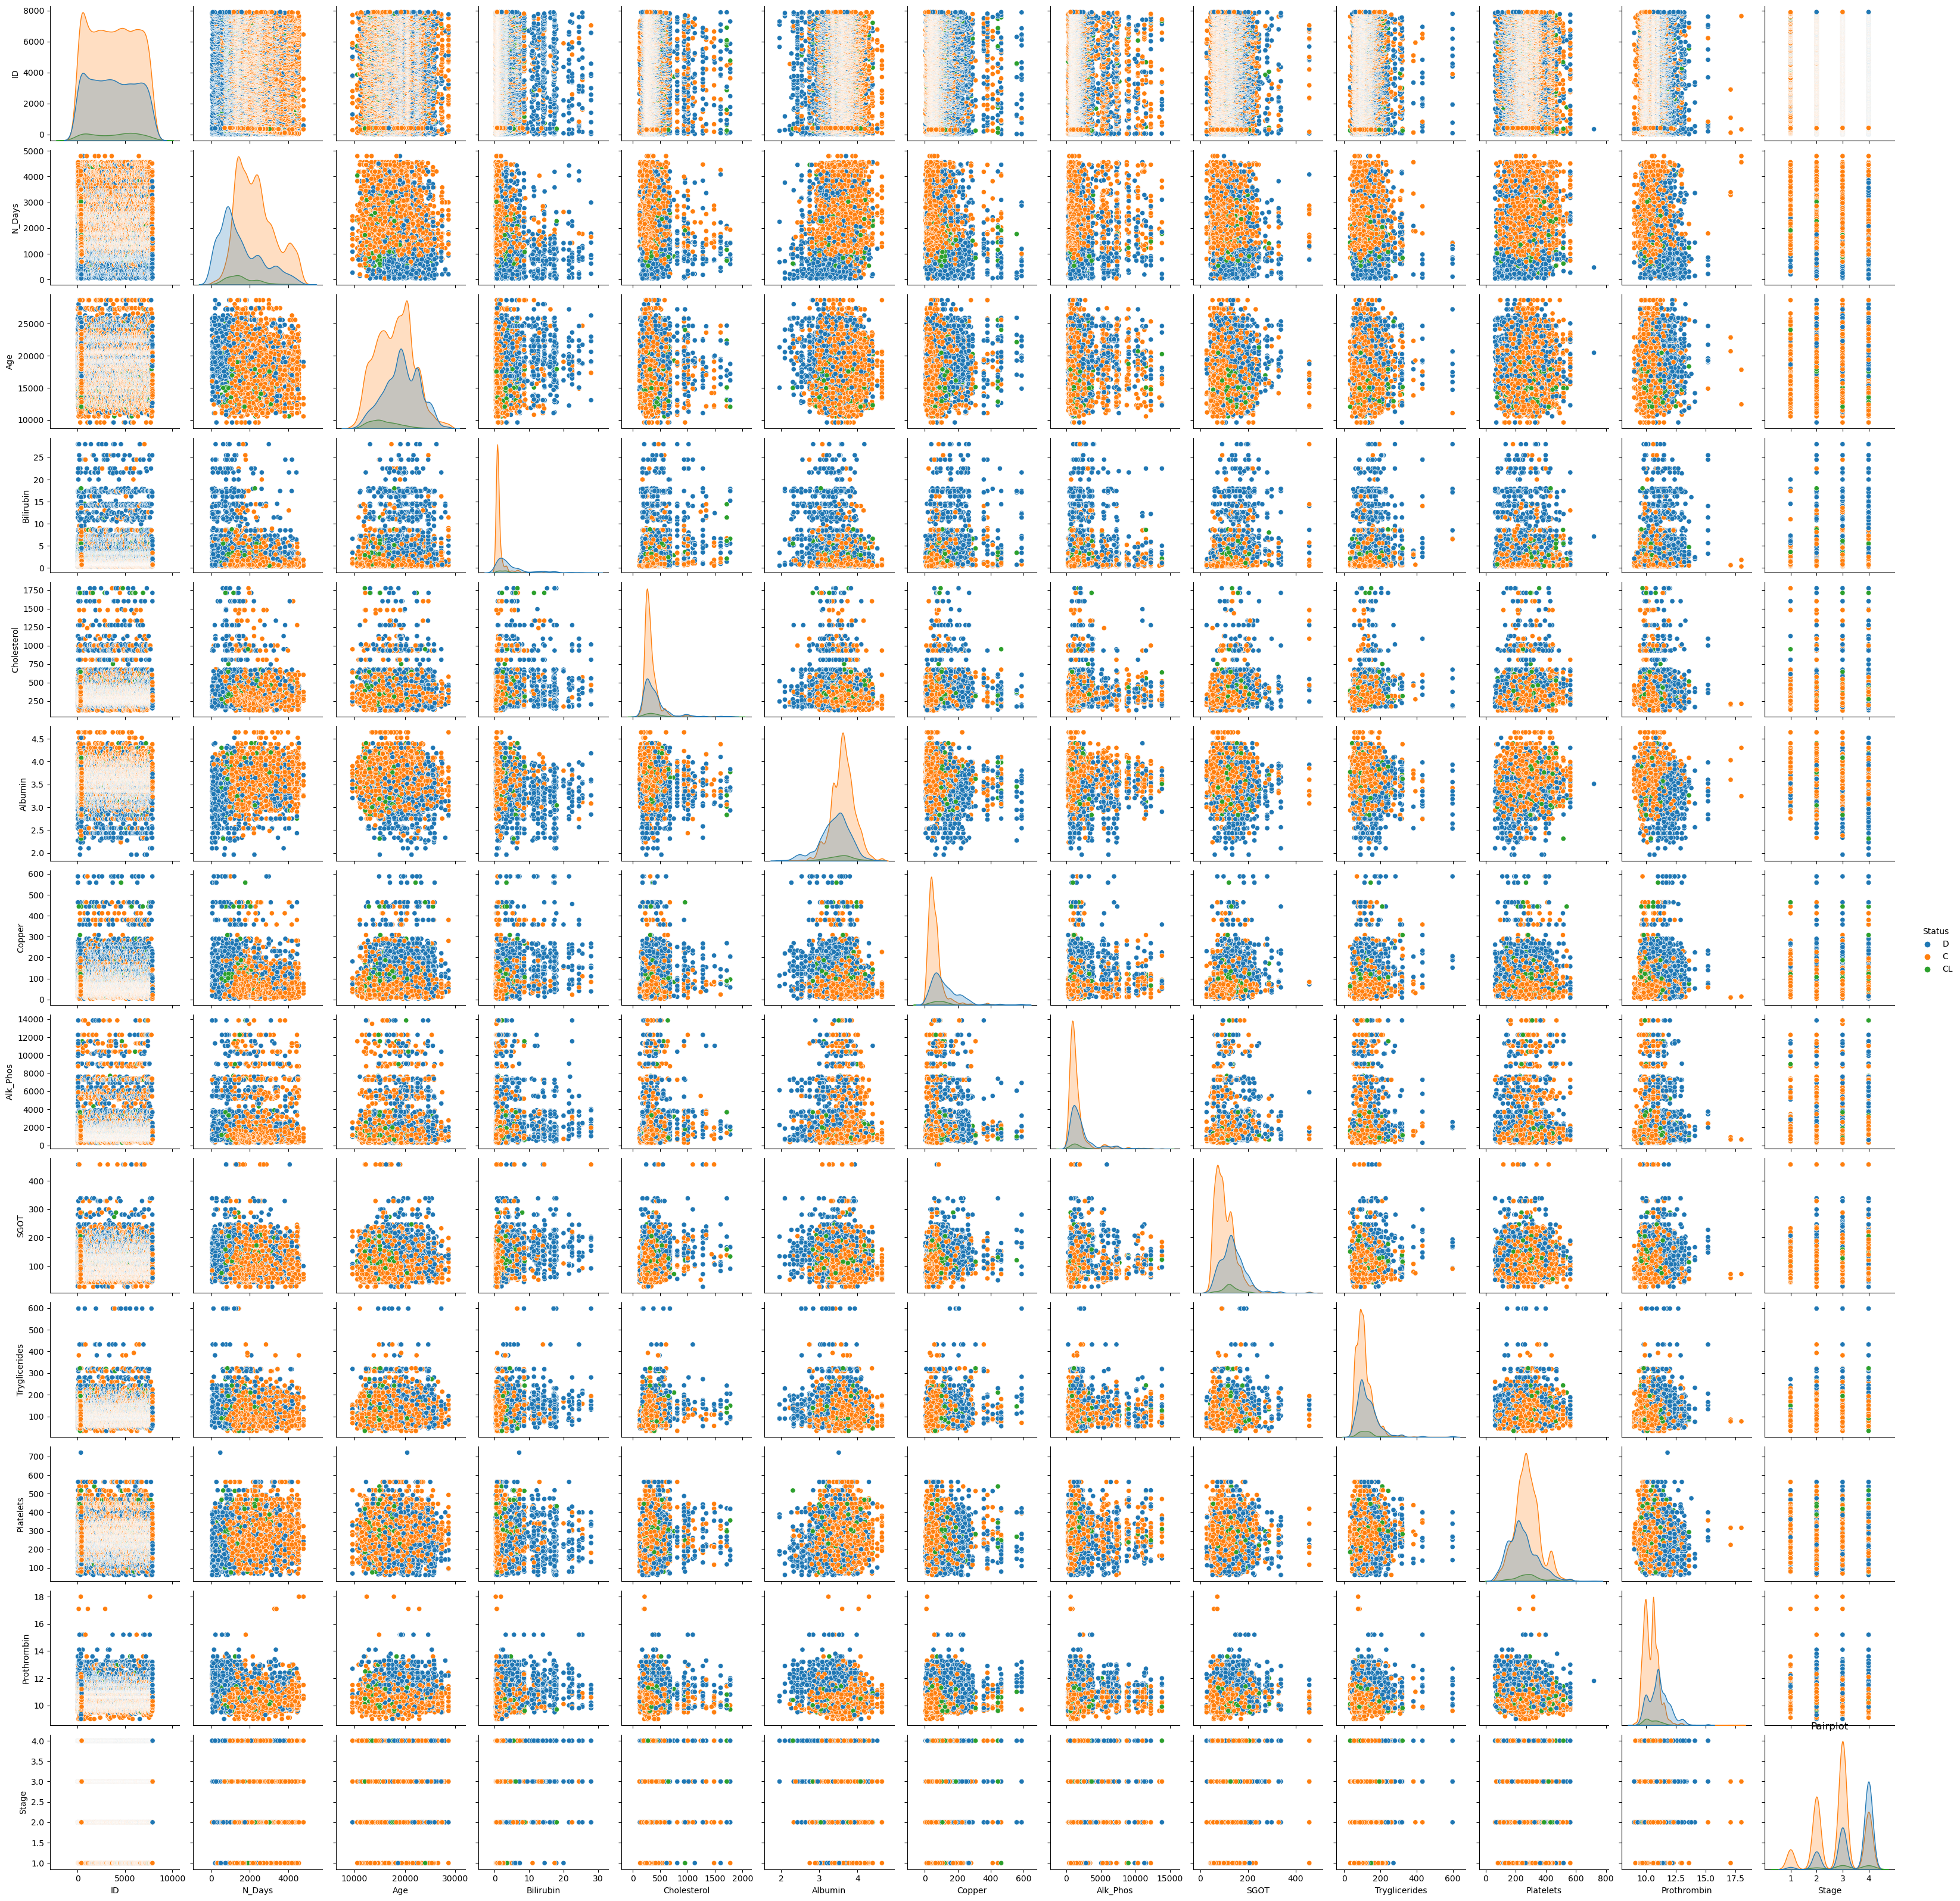

In [10]:
# Pairplot
sns.pairplot(data=df, hue='Status')
plt.title('Pairplot')
plt.show()

<Figure size 1200x800 with 0 Axes>

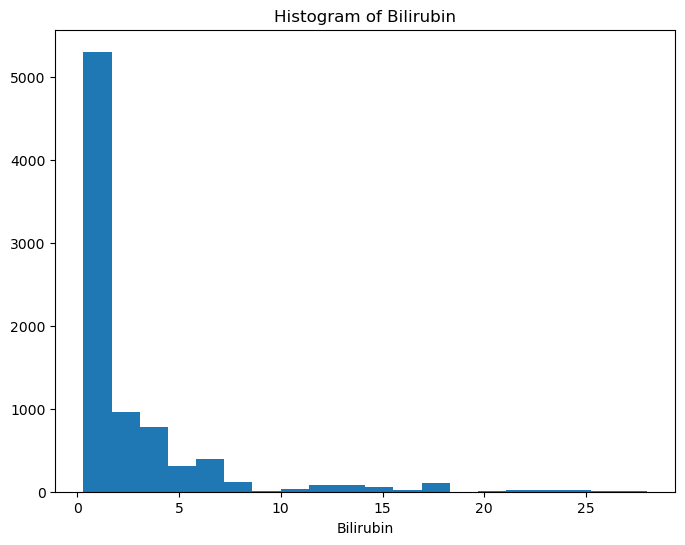

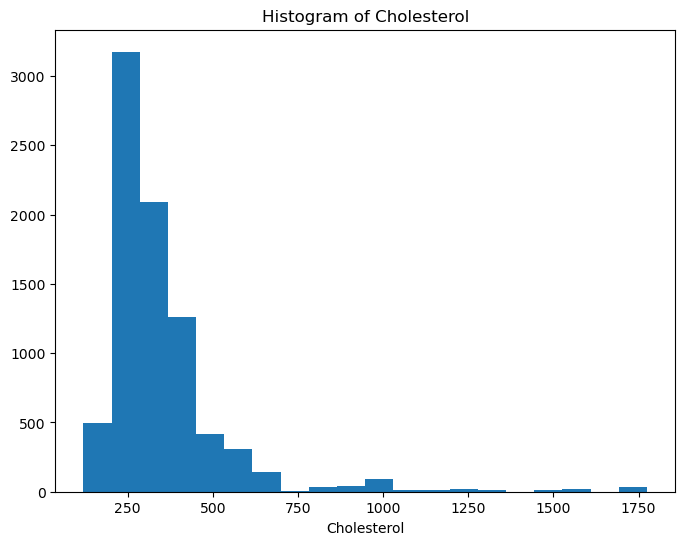

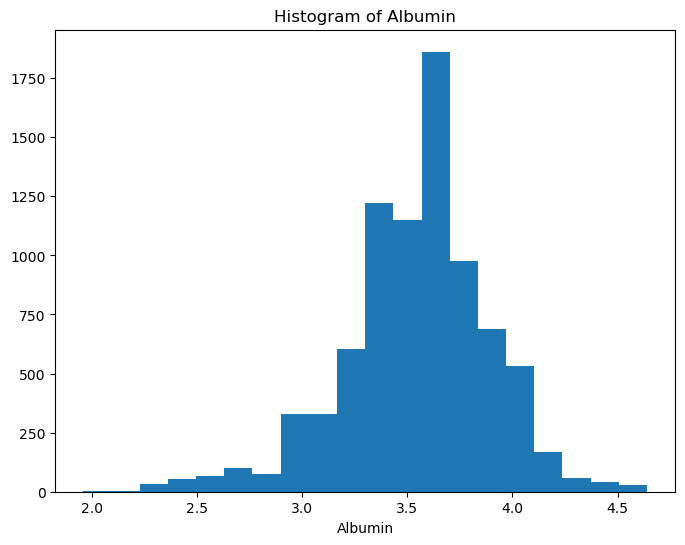

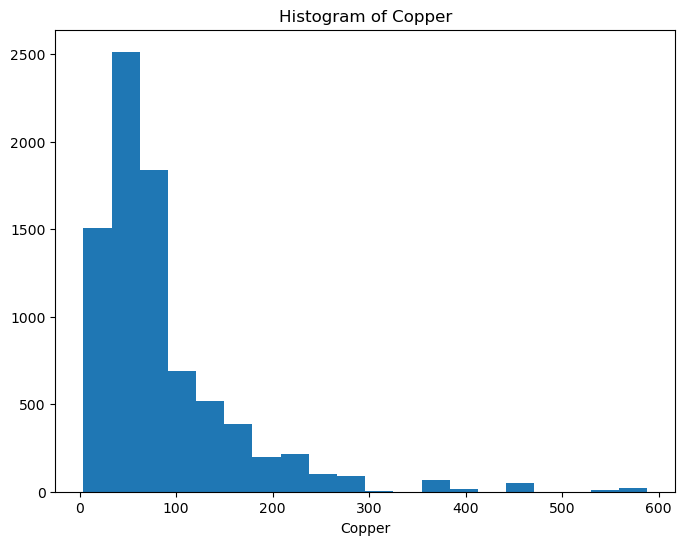

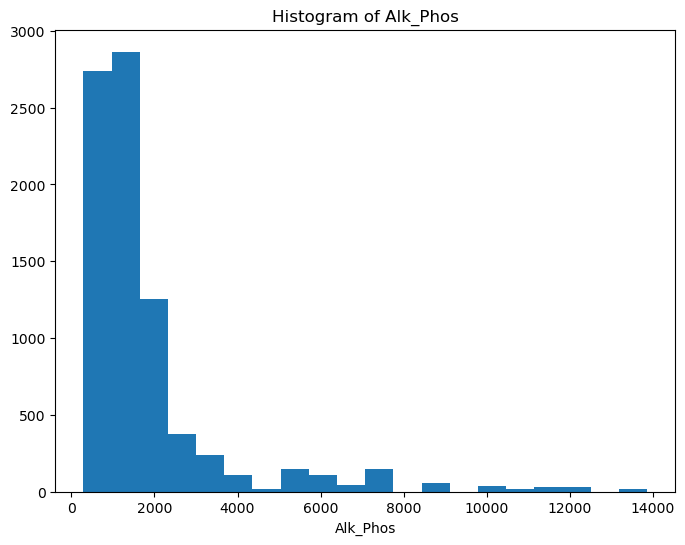

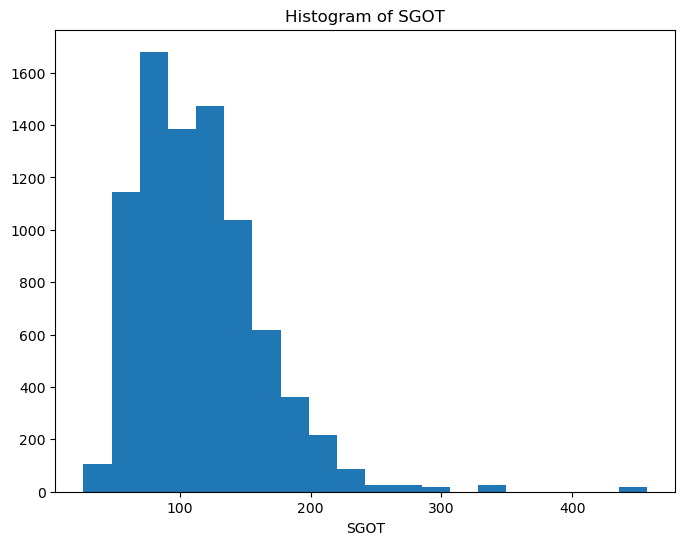

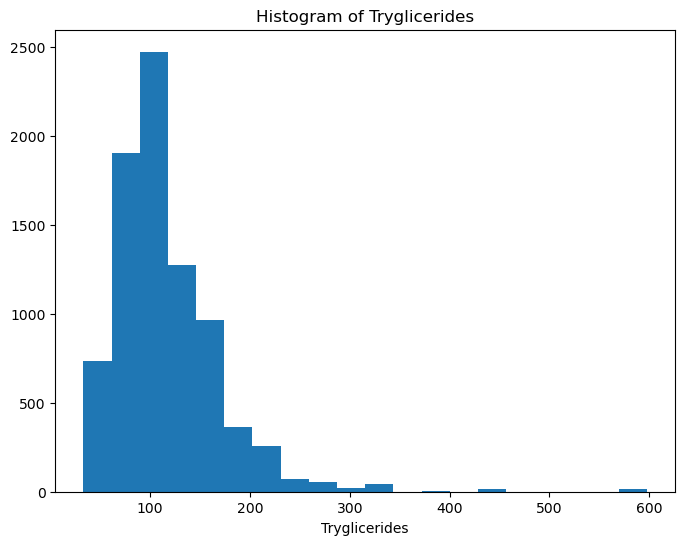

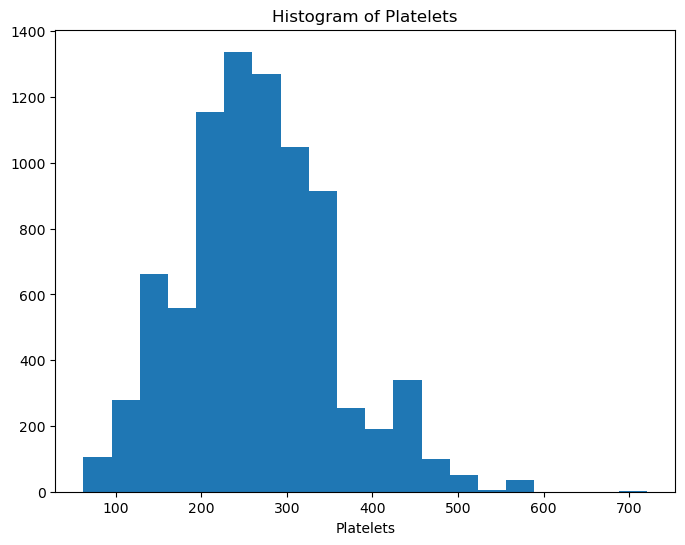

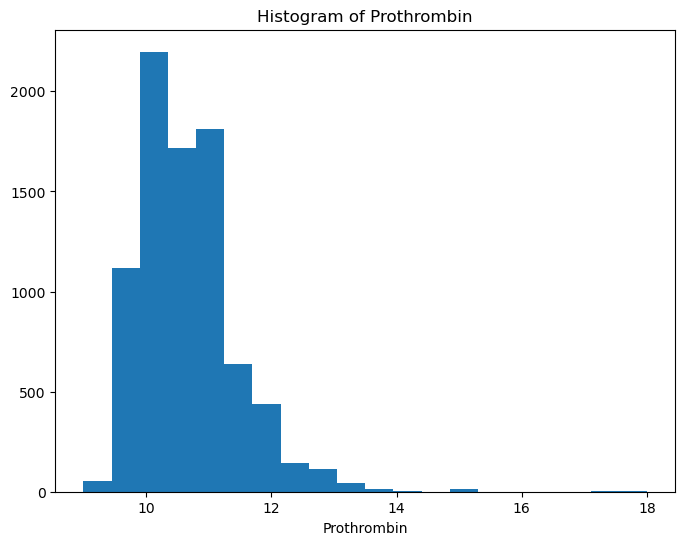

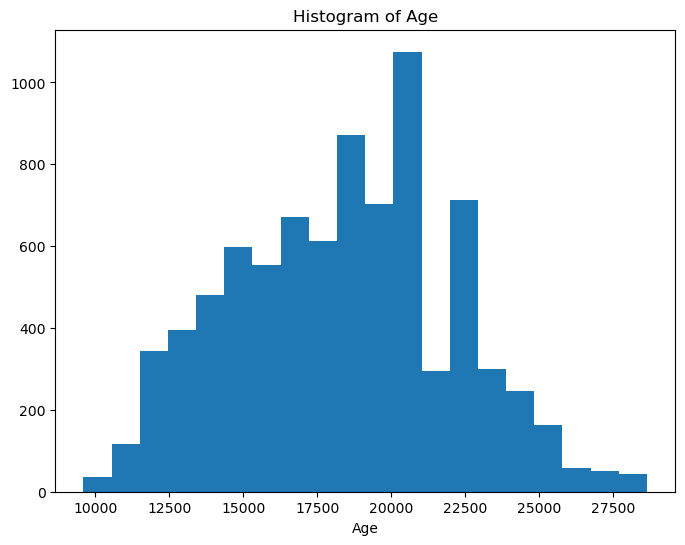

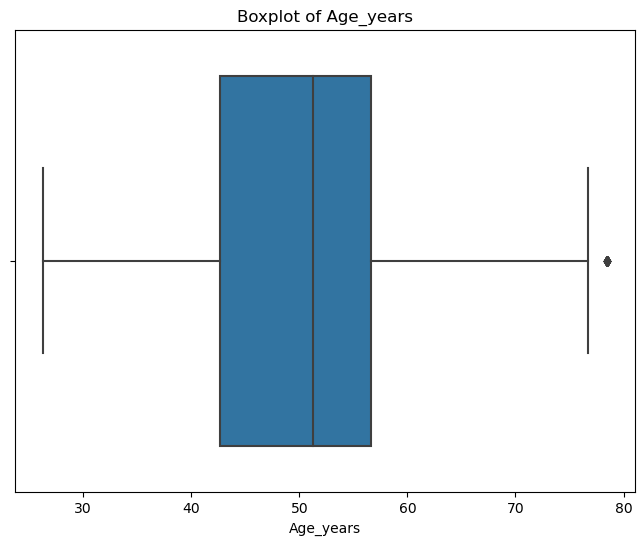

In [11]:
# Convert 'Age' from days to years
temp_df = df.copy()  # Create a copy of the original DataFrame
temp_df['Age_years'] = temp_df['Age'] / 365.25

# Numerical columns excluding 'N_Days' and 'Age'
numerical_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']

# Plot histogram for each numerical feature
plt.figure(figsize=(12, 8))
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(temp_df[col],bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()
    
plt.figure(figsize=(8, 6))
sns.boxplot(x=temp_df['Age_years'])
plt.title('Boxplot of Age_years')
plt.xlabel('Age_years')
plt.show()

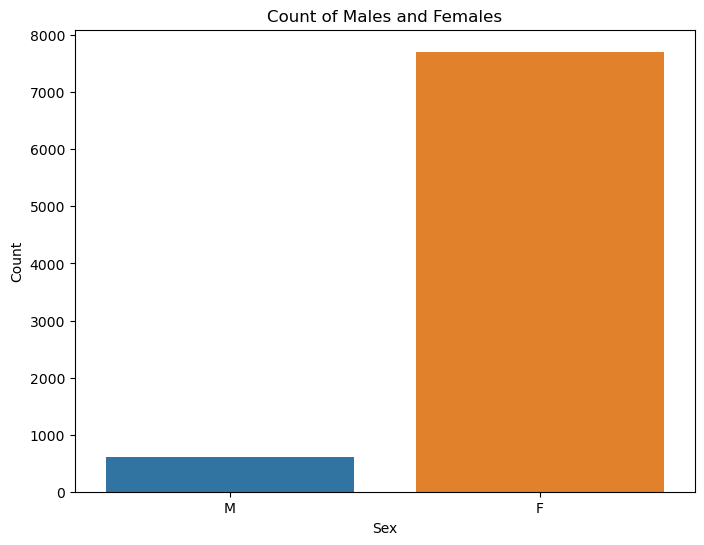

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Count of Males and Females')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [13]:
#Replacing null values in the categorical columns with mode
categorical_cols = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
#Replace missing values in numerical variables with mean
numerical_cols_NA = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

for col in numerical_cols_NA:
    df[col].fillna(df[col].mean(), inplace=True)

In [15]:
df.isnull().sum()

ID               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [16]:
df['Stage'] = df['Stage'].astype(str)

In [17]:
df.dtypes

ID                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage             object
Status            object
dtype: object

In [18]:
df.drop('ID', axis=1, inplace=True)

In [19]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ascites'] = label_encoder.fit_transform(df['Ascites'])
df['Hepatomegaly'] = label_encoder.fit_transform(df['Hepatomegaly'])
df['Spiders'] = label_encoder.fit_transform(df['Spiders'])
df['Edema'] = label_encoder.fit_transform(df['Edema'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])
df['Status'] = label_encoder.fit_transform(df['Status'])

In [20]:
# Split the dataset into features and target
X = df.drop('Status', axis=1)
y = df['Status']

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Normalize numerical features after splitting
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [23]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

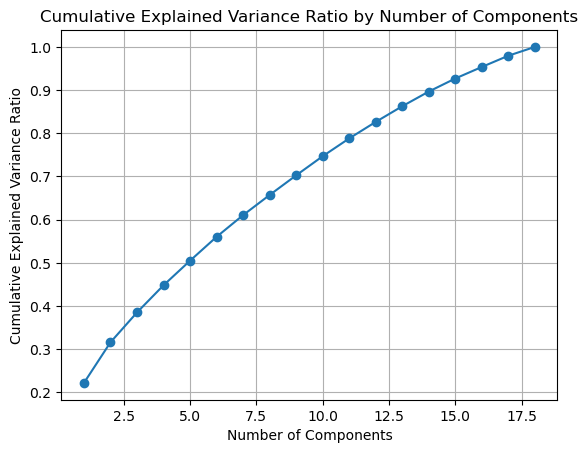

In [24]:
# Plot explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [25]:
explained_variance_ratio_cumulative

array([0.22192469, 0.31598752, 0.38511502, 0.44803222, 0.50493905,
       0.5601952 , 0.61046122, 0.65709717, 0.70257621, 0.74685531,
       0.7880944 , 0.82633137, 0.86262506, 0.89659537, 0.92686086,
       0.95357077, 0.97962498, 1.        ])

In [26]:
pca1 = PCA(0.95)
X_train_pca = pca1.fit_transform(X_train)

In [27]:
X_train_pca.shape

(6658, 16)

# Logistic Regression

In [28]:
# Train Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred_lr = logistic_regression.predict(X_test)

In [30]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1054
           1       0.00      0.00      0.00        57
           2       0.74      0.66      0.70       554

    accuracy                           0.79      1665
   macro avg       0.52      0.52      0.52      1665
weighted avg       0.76      0.79      0.77      1665



C:\Users\hansa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hansa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hansa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[947   0 107]
 [ 38   0  19]
 [187   0 367]]


In [32]:
y_prob = logistic_regression.predict_proba(X_test)
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



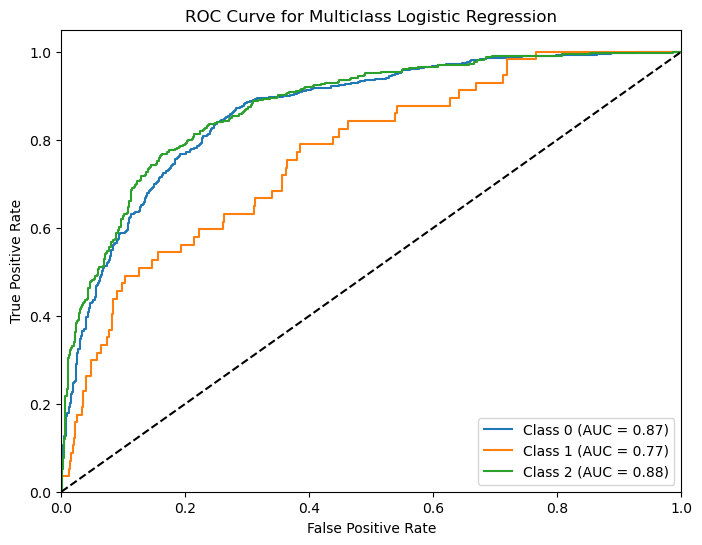

In [33]:
#ROC for multiclass classification
# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### post processing procedures for this logistic regression model

In [34]:
# Adjusting classification threshold
threshold = 0.01# Example threshold value
y_pred_threshold = (logistic_regression.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Handling class imbalance with class weights
logistic_regression_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_regression_balanced.fit(X_train, y_train)
y_pred_balanced = logistic_regression_balanced.predict(X_test)

In [35]:
# Confusion matrix for adjusted classification threshold
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

# Print confusion matrix for adjusted classification threshold
print("\nConfusion Matrix for Adjusted Classification Threshold:")
print(conf_matrix_threshold)

# Confusion matrix for handling class imbalance with balanced class weights
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Print confusion matrix for handling class imbalance with balanced class weights
print("\nConfusion Matrix for Handling Class Imbalance with Balanced Class Weights:")
print(conf_matrix_balanced)


Confusion Matrix for Adjusted Classification Threshold:
[[245 809   0]
 [  0  57   0]
 [104 450   0]]

Confusion Matrix for Handling Class Imbalance with Balanced Class Weights:
[[771 168 115]
 [ 19  32   6]
 [ 97 125 332]]


# MLP Classifier

In [36]:
# Train MLP Classifier model 
mlp_model = Sequential()
mlp_model.add(Input(shape=(18,)))
mlp_model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
mlp_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
mlp_model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons (for each class) and softmax activation


In [37]:
# Compile the model
#In the context of multi-class classification, where the target variable contains integer labels ( 0, 1, 2,), sparse_categorical_crossentropy is typically used as the loss function.
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
# Fit the compiled model to the training data 
history = mlp_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7018 - loss: 0.7285 - val_accuracy: 0.8024 - val_loss: 0.5265
Epoch 2/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.5304 - val_accuracy: 0.8090 - val_loss: 0.5095
Epoch 3/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4859 - val_accuracy: 0.8060 - val_loss: 0.5026
Epoch 4/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.4851 - val_accuracy: 0.8072 - val_loss: 0.4962
Epoch 5/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4712 - val_accuracy: 0.8096 - val_loss: 0.4947
Epoch 6/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4886 - val_accuracy: 0.8126 - val_loss: 0.4922
Epoch 7/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8187 - loss: 0.4530 - val_accuracy: 0.8054 - val_loss: 0.4954
Epoch 8/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4521 - 

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9225 - loss: 0.2215 - val_accuracy: 0.7766 - val_loss: 0.7728
Epoch 100/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.2289 - val_accuracy: 0.7706 - val_loss: 0.7737
Epoch 101/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9205 - loss: 0.2197 - val_accuracy: 0.7664 - val_loss: 0.7673
Epoch 102/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9142 - loss: 0.2317 - val_accuracy: 0.7790 - val_loss: 0.7704
Epoch 103/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2229 - val_accuracy: 0.7754 - val_loss: 0.7767
Epoch 104/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 0.2060 - val_accuracy: 0.7676 - val_loss: 0.7855
Epoch 105/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.2183 - val_accuracy: 0.7670 - val_loss: 0.7852
Epoch 106/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.2369 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9546 - loss: 0.1201 - val_accuracy: 0.7465 - val_loss: 1.2793
Epoch 198/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1253 - val_accuracy: 0.7483 - val_loss: 1.2553
Epoch 199/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 0.1220 - val_accuracy: 0.7556 - val_loss: 1.2743
Epoch 200/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9589 - loss: 0.1192 - val_accuracy: 0.7502 - val_loss: 1.2646
Epoch 201/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1195 - val_accuracy: 0.7538 - val_loss: 1.2699
Epoch 202/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1158 - val_accuracy: 0.7411 - val_loss: 1.2893
Epoch 203/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.1148 - val_accuracy: 0.7423 - val_loss: 1.2748
Epoch 204/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9595 - loss: 0.1111 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.0696 - val_accuracy: 0.7321 - val_loss: 1.8240
Epoch 296/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9769 - loss: 0.0718 - val_accuracy: 0.7435 - val_loss: 1.7772
Epoch 297/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0688 - val_accuracy: 0.7357 - val_loss: 1.8375
Epoch 298/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.0719 - val_accuracy: 0.7459 - val_loss: 1.8124
Epoch 299/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1358 - val_accuracy: 0.7297 - val_loss: 1.8309
Epoch 300/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9771 - loss: 0.0852 - val_accuracy: 0.7327 - val_loss: 1.8325
Epoch 301/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9834 - loss: 0.0622 - val_accuracy: 0.7435 - val_loss: 1.8480
Epoch 302/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0634 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0461 - val_accuracy: 0.7171 - val_loss: 2.4272
Epoch 394/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0373 - val_accuracy: 0.7441 - val_loss: 2.4492
Epoch 395/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.0531 - val_accuracy: 0.7285 - val_loss: 2.4993
Epoch 396/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0398 - val_accuracy: 0.7471 - val_loss: 2.4342
Epoch 397/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0600 - val_accuracy: 0.7321 - val_loss: 2.4335
Epoch 398/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0445 - val_accuracy: 0.7429 - val_loss: 2.4671
Epoch 399/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.0522 - val_accuracy: 0.7279 - val_loss: 2.4881
Epoch 400/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9870 - loss: 0.0482 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0353 - val_accuracy: 0.7303 - val_loss: 2.9208
Epoch 492/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 0.0385 - val_accuracy: 0.7544 - val_loss: 2.9407
Epoch 493/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0633 - val_accuracy: 0.7333 - val_loss: 2.9283
Epoch 494/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0330 - val_accuracy: 0.7387 - val_loss: 2.9149
Epoch 495/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9934 - loss: 0.0342 - val_accuracy: 0.7387 - val_loss: 2.9318
Epoch 496/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0372 - val_accuracy: 0.7303 - val_loss: 2.9521
Epoch 497/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0367 - val_accuracy: 0.7297 - val_loss: 2.9886
Epoch 498/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0325 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0256 - val_accuracy: 0.7369 - val_loss: 3.3720
Epoch 590/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0285 - val_accuracy: 0.7351 - val_loss: 3.3329
Epoch 591/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0385 - val_accuracy: 0.7381 - val_loss: 3.4631
Epoch 592/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9843 - loss: 0.0495 - val_accuracy: 0.7303 - val_loss: 3.3516
Epoch 593/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.7351 - val_loss: 3.3221
Epoch 594/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9916 - loss: 0.0334 - val_accuracy: 0.7321 - val_loss: 3.3988
Epoch 595/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9921 - loss: 0.0292 - val_accuracy: 0.7381 - val_loss: 3.3720
Epoch 596/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0321 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9915 - loss: 0.0364 - val_accuracy: 0.7291 - val_loss: 3.7551
Epoch 688/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0221 - val_accuracy: 0.7219 - val_loss: 3.7739
Epoch 689/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0306 - val_accuracy: 0.7339 - val_loss: 3.6922
Epoch 690/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0339 - val_accuracy: 0.7339 - val_loss: 3.7516
Epoch 691/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0229 - val_accuracy: 0.7225 - val_loss: 3.7427
Epoch 692/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0281 - val_accuracy: 0.7429 - val_loss: 3.7639
Epoch 693/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0341 - val_accuracy: 0.7393 - val_loss: 3.7424
Epoch 694/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0381 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0300 - val_accuracy: 0.7351 - val_loss: 3.9394
Epoch 786/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9897 - loss: 0.0485 - val_accuracy: 0.7273 - val_loss: 3.9614
Epoch 787/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0206 - val_accuracy: 0.7435 - val_loss: 3.9732
Epoch 788/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0395 - val_accuracy: 0.7309 - val_loss: 4.0318
Epoch 789/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0360 - val_accuracy: 0.7279 - val_loss: 4.0387
Epoch 790/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0427 - val_accuracy: 0.7387 - val_loss: 3.9459
Epoch 791/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.7297 - val_loss: 4.0125
Epoch 792/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0223 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0219 - val_accuracy: 0.7285 - val_loss: 4.1837
Epoch 884/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0194 - val_accuracy: 0.7327 - val_loss: 4.1445
Epoch 885/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0222 - val_accuracy: 0.7327 - val_loss: 4.1422
Epoch 886/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9884 - loss: 0.0511 - val_accuracy: 0.7279 - val_loss: 4.2409
Epoch 887/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0175 - val_accuracy: 0.7453 - val_loss: 4.1451
Epoch 888/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0158 - val_accuracy: 0.7351 - val_loss: 4.1880
Epoch 889/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0224 - val_accuracy: 0.7303 - val_loss: 4.2507
Epoch 890/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0141 -

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0205 - val_accuracy: 0.7387 - val_loss: 4.3328
Epoch 982/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9959 - loss: 0.0276 - val_accuracy: 0.7285 - val_loss: 4.3557
Epoch 983/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0161 - val_accuracy: 0.7375 - val_loss: 4.3844
Epoch 984/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.0484 - val_accuracy: 0.7213 - val_loss: 4.3745
Epoch 985/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0273 - val_accuracy: 0.7345 - val_loss: 4.3560
Epoch 986/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.7441 - val_loss: 4.4003
Epoch 987/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0159 - val_accuracy: 0.7225 - val_loss: 4.3970
Epoch 988/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0255 -

In [39]:
# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7210 - loss: 4.4490
Test Loss: 4.335983753204346
Test Accuracy: 0.7243243455886841


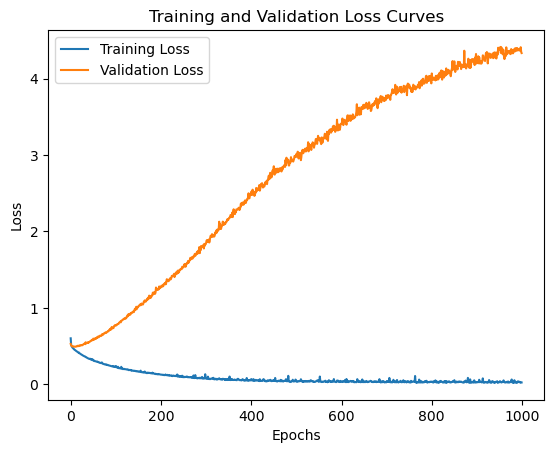

In [40]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

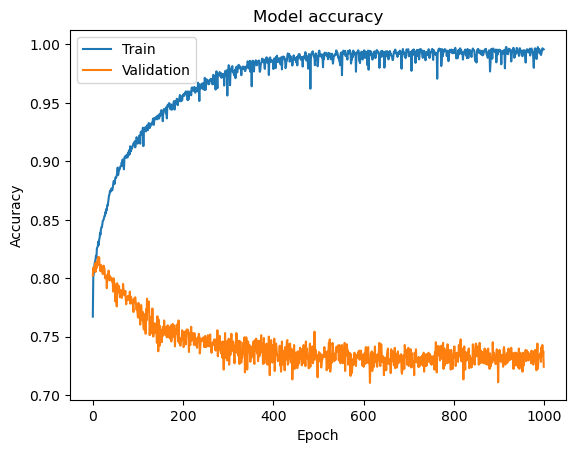

In [41]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
# Use the trained MLP model to predict classes for the test data
y_pred_mlp = mlp_model.predict(X_test)

# Since the MLP model outputs probabilities for each class, you need to convert the probabilities to class labels
# For example, you can use argmax to get the index of the class with the highest probability
y_pred_classes = y_pred_mlp.argmax(axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1054
           1       0.10      0.14      0.12        57
           2       0.66      0.64      0.65       554

    accuracy                           0.72      1665
   macro avg       0.52      0.53      0.52      1665
weighted avg       0.73      0.72      0.73      1665



In [43]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[841  47 166]
 [ 30   8  19]
 [173  24 357]]


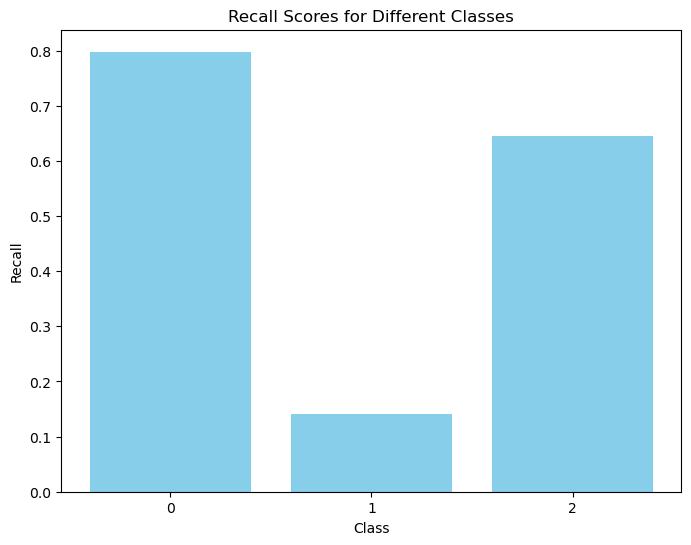

In [44]:
# Calculate recall for each class
recall_scores = recall_score(y_test, y_pred_classes, average=None)

# Plot recall scores for different classes
plt.figure(figsize=(8, 6))
plt.bar(range(len(recall_scores)), recall_scores, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Classes')
plt.xticks(range(len(recall_scores)))
plt.show()

# Random Forest Classifier

In [45]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)


In [46]:
# Training the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [47]:

y_pred_rf = random_forest.predict(X_test)


In [48]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1054
           1       0.67      0.21      0.32        57
           2       0.80      0.70      0.75       554

    accuracy                           0.83      1665
   macro avg       0.77      0.61      0.65      1665
weighted avg       0.82      0.83      0.82      1665



In [49]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[976   2  76]
 [ 26  12  19]
 [162   4 388]]


In [50]:
# Define parameter grid for hyperparameter tuning to find the best parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
# Initialize GridSearchCV
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1, verbose=2)

In [52]:
# Fit GridSearchCV to training data
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [53]:
# Get best parameters
best_params = grid_search_rf.best_params_
print("\nBest Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
# Get best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)


In [55]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1054
           1       0.71      0.18      0.28        57
           2       0.80      0.71      0.75       554

    accuracy                           0.83      1665
   macro avg       0.79      0.60      0.64      1665
weighted avg       0.82      0.83      0.82      1665



In [56]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

Confusion Matrix:
[[976   2  76]
 [ 27  10  20]
 [158   2 394]]


## Evaluation of the models

In [57]:
# Evaluate Logistic Regression model
lr_accuracy = accuracy_score(y_test, y_pred_balanced)
lr_precision = precision_score(y_test, y_pred_balanced, average='weighted')
lr_recall = recall_score(y_test, y_pred_balanced, average='weighted')
lr_f1 = f1_score(y_test, y_pred_balanced, average='weighted')
lr_roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')  # One-vs-Rest strategy

y_prob_mlp = mlp_model.predict(X_test)
# Evaluate MLP Classifier model
mlp_accuracy = accuracy_score(y_test, y_pred_classes)
mlp_precision = precision_score(y_test, y_pred_classes, average='weighted')
mlp_recall = recall_score(y_test, y_pred_classes, average='weighted')
mlp_f1 = f1_score(y_test, y_pred_classes, average='weighted')
mlp_roc_auc = roc_auc_score(y_test, y_prob_mlp, multi_class='ovr')


y_prob_rf = best_rf_model.predict_proba(X_test)
# Evaluate Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
rf_precision = precision_score(y_test, y_pred_best_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_best_rf, average='weighted')
rf_f1 = f1_score(y_test,y_pred_best_rf, average='weighted')
rf_roc_auc = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')


# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("ROC AUC Score:", lr_roc_auc)
print()

print("MLP Classifier:")
print("Accuracy:", mlp_accuracy)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)
print("F1 Score:", mlp_f1)
print("ROC AUC Score:", mlp_roc_auc)
print()

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("c:", rf_roc_auc)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Logistic Regression:
Accuracy: 0.6816816816816816
Precision: 0.7974741579214131
Recall: 0.6816816816816816
F1 Score: 0.7280384624583236
ROC AUC Score: 0.83586918811631

MLP Classifier:
Accuracy: 0.7243243243243244
Precision: 0.7325716315284565
Recall: 0.7243243243243245
F1 Score: 0.7283022348808693
ROC AUC Score: 0.7679509515220427

Random Forest Classifier:
Accuracy: 0.8288288288288288
Precision: 0.8241594397223779
Recall: 0.8288288288288288
F1 Score: 0.8186558347965828
c: 0.8758662559904109


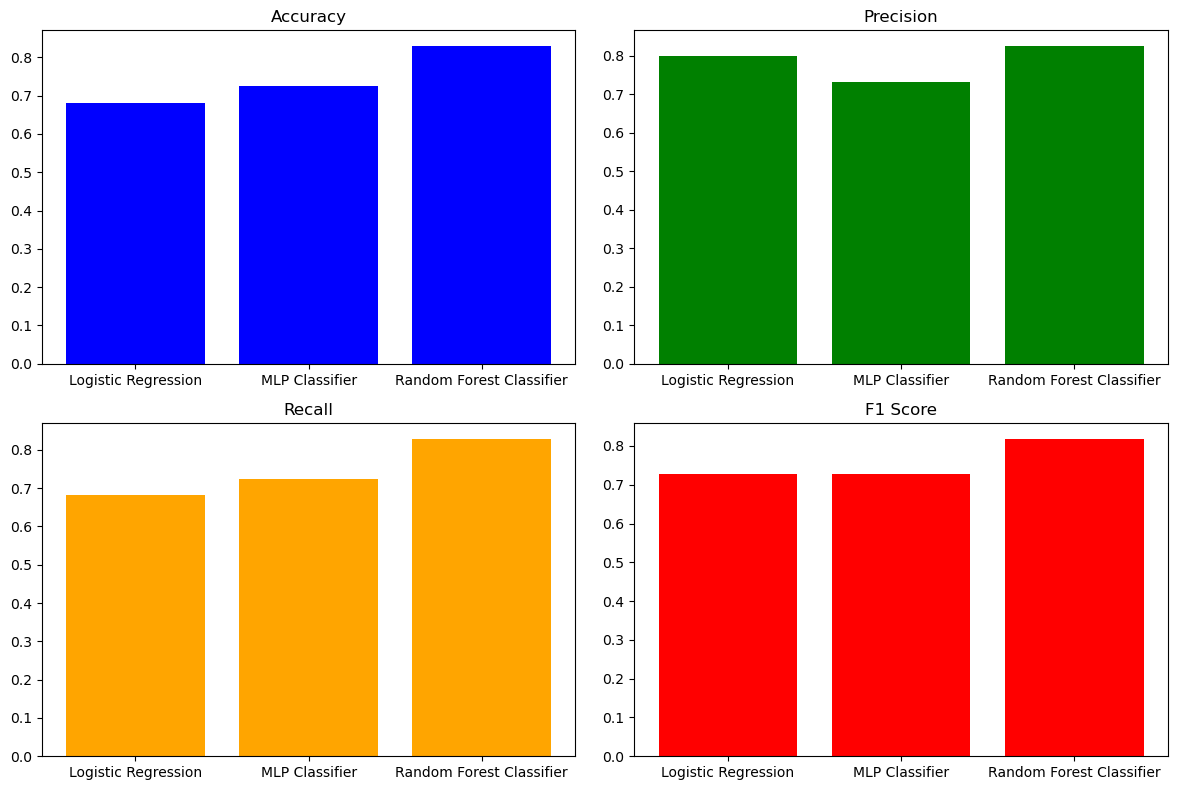

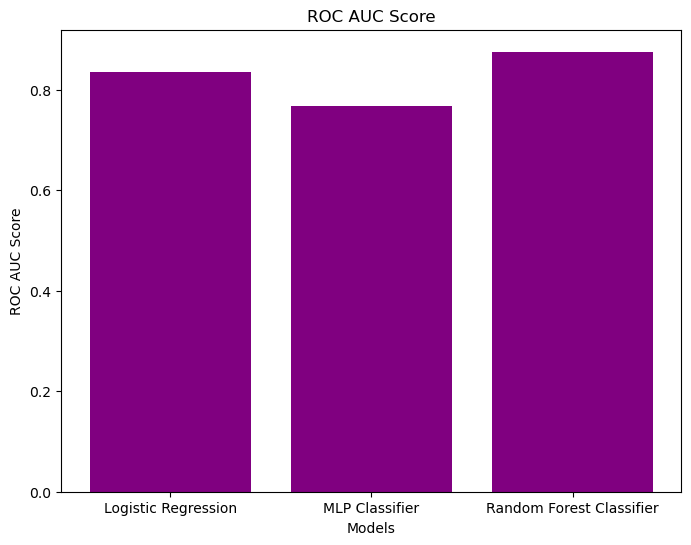

In [58]:
# To Visualize
models = ['Logistic Regression', 'MLP Classifier', 'Random Forest Classifier']
accuracy = [lr_accuracy, mlp_accuracy, rf_accuracy]
precision = [lr_precision, mlp_precision, rf_precision]
recall = [lr_recall, mlp_recall, rf_recall]
f1 = [lr_f1, mlp_f1, rf_f1]
roc_auc = [lr_roc_auc, mlp_roc_auc, rf_roc_auc]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].bar(models, accuracy, color='blue')
axs[0, 0].set_title('Accuracy')
axs[0, 1].bar(models, precision, color='green')
axs[0, 1].set_title('Precision')
axs[1, 0].bar(models, recall, color='orange')
axs[1, 0].set_title('Recall')
axs[1, 1].bar(models, f1, color='red')
axs[1, 1].set_title('F1 Score')

# Adjust layout
plt.tight_layout()
plt.show()

# ROC AUC Score
plt.figure(figsize=(8, 6))
plt.bar(models, roc_auc, color='purple')
plt.title('ROC AUC Score')
plt.xlabel('Models')
plt.ylabel('ROC AUC Score')
plt.show()

# Representation of Final Output

In [59]:
class_labels = ['Status_C', 'Status_CL', 'Status_D']

# Get the predicted class index for each sample
predicted_class_index = y_prob_rf.argmax(axis=1)

# Inverse transform the predicted class index to get the original class labels
predicted_class = label_encoder.inverse_transform(predicted_class_index)

# Create a DataFrame to store the probabilities and predicted class
Output = pd.DataFrame(y_prob_rf, columns=class_labels)
Output['Predicted_Class'] = predicted_class


Output = Output[['Status_C', 'Status_CL', 'Status_D', 'Predicted_Class']]

# Display the DataFrame
print(Output)

      Status_C  Status_CL  Status_D Predicted_Class
0     0.564724   0.035000  0.400276               C
1     0.174762   0.032762  0.792476               D
2     1.000000   0.000000  0.000000               C
3     0.955000   0.000000  0.045000               C
4     0.735833   0.039048  0.225119               C
...        ...        ...       ...             ...
1660  0.932564   0.000000  0.067436               C
1661  0.839167   0.012500  0.148333               C
1662  0.965500   0.000000  0.034500               C
1663  0.893000   0.005000  0.102000               C
1664  0.870000   0.018214  0.111786               C

[1665 rows x 4 columns]


## Above dataframe shows the predicted probabilities generated by the Random Forest model, our best performed model. These probabilities indicate the likelihood of the sample belonging to each class.